## Unit 2 - Time-Independent Schrödinger Equation

<a href="https://colab.research.google.com/github/uqglmn/qm/blob/main/QM_Problem_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem 2.5

A particle in the infinite square well has as its initial wave function an even
mixture of the first two stationary states:

$$
\Psi(x,0) = A ( \psi_1(x) + \psi_2(x) )
$$

(a) Normalise $\Psi(x,0)$.

(b) Find $\Psi(x, t)$ and $\Psi|(x,t)|^2$. Express the latter as a sinusoidal function of time. To simplify the result, use notation $\omega=\dfrac{\pi^2\hbar}{2ma^2} = \dfrac{E_1}{\hbar}$.

(c) Compute $\langle x \rangle$. Notice that it oscillates in time. What is the angular frequency of the oscillation? What is the amplitude of the oscillation?

(d) Compute $\langle \hat p \rangle$.

(e) If you measured the energy of this particle, what values might you get, and what is the probability of getting each of them? Find the expectation value of $\hat H$. How does it compare with $E_1$ and $E_2$?

### Solution

#### Load SymPy and variables

In [1]:
import sympy as sym

In [2]:
# constants that we will need
m, h, w, A, a = sym.symbols("m, hbar, w, A, a", positive = True, real = True)
x, t = sym.symbols("x, t", real = True)

In [3]:
sym.init_printing(use_unicode=True)

#### Solution to (a)

Stationary solutions:
$
\psi_n(x) = \sqrt{\dfrac{2}{a}} \sin \dfrac{n\pi x}{a}
$

The allowed energy levels: $E_n = \dfrac{n^2 \pi^2 \hbar^2}{2ma} = n^2 \omega \hbar$


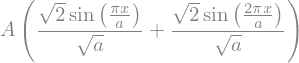

In [4]:
# the initial state Ψ(x,0)
Ψ0 = A * ( sym.sqrt(2/a) * sym.sin(sym.pi*x/a) + sym.sqrt(2/a) * sym.sin(2*sym.pi*x/a) )
Ψ0

In [5]:
# normalisation condition
sym.integrate(sym.conjugate(Ψ0)*Ψ0,(x, 0, a))

In [6]:
# from above we find that A = 1/sqrt(2)
A = 1/sym.sqrt(2)
A

#### Solution to (b)

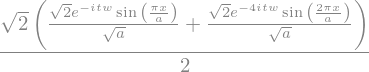

In [7]:
# wave function Ψ(x,t)
# here we're using the notation E1 = w*h
Ψt = A * ( sym.sqrt(2/a) * sym.sin(sym.pi*x/a) * sym.exp(-sym.I*w*t) + sym.sqrt(2/a) * sym.sin(2*sym.pi*x/a) * sym.exp(-sym.I*4*w*t) )
Ψt

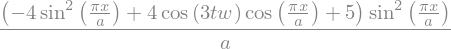

In [8]:
# the absolute value of the wave function squared
ΨtSq = (sym.conjugate(Ψt) * Ψt).factor().rewrite(sym.sin).simplify()
ΨtSq

#### Solution to (c)

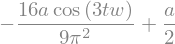

In [9]:
# the expectation value of x, "the mean of x, or mx"
mx = sym.integrate(x*ΨtSq, (x, 0, a)).simplify()
mx

We see that $\langle x \rangle$ oscillates about $\dfrac{a}{2}$ with the amplitude $\dfrac{16a}{9\pi^2}$.

The angular frequency is $3\omega = \dfrac{3\pi^2\hbar}{2ma^2}$.

#### Solution to (d)

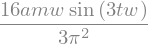

In [10]:
# the expectation value of p, "the mean of p, or mp"
mp = m*sym.diff(mx, t).simplify()
mp

This expression can be simplyfied by substituting $\omega = \dfrac{\pi^2 \hbar}{2ma^2}$ into the $\omega$ in the numerator:

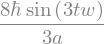

In [11]:
# multiply with pi^2h / 2ma^2 and divide by w:
mp * (sym.pi**2 * h / (2*m*a**2)) / w

#### Solution to (e)

The energy expectation value is 

$\langle \hat H \rangle = \sum_{n=1}^\infty |c_n|^2 E_n$

We found that 

$
\Psi(x,t) = \frac{1}{\sqrt{2}} ( \psi_1(x) e^{-iE_1t/\hbar}+ \psi_2(x) e^{-iE_2t/\hbar} )
$

This mean that:

- There is $P_1 = |c_1|^2 = \dfrac12$ probability to measure $E_1$
- There is $P_2 = |c_2|^2 = \dfrac12$ probability to measure $E_2=4E_1$

Therefore:

$\langle \hat H \rangle = \dfrac12 E_1 + \dfrac12 E_2 = \dfrac52E_1 = \dfrac{5\pi^2\hbar^2}{2ma^2}$

and

$E_1 < \langle \hat H \rangle < E_2$

---